## Import Library

In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

## Read Data

In [129]:
df = pd.read_csv("../Dataset/AirQuality.csv", delimiter=";")
df.shape

(9471, 17)

In [130]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [131]:
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

## Membersihkan Data

In [132]:
df = df.dropna(axis=0, how='all')  # untuk menghapus baris jika semua adalanya nan
df = df.dropna(axis=1, how='all')   # untuk menghapus kolom jika semua isinya adalah nan
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [133]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [134]:
df.shape

(9357, 15)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [136]:
df['T'] = pd.to_numeric(df['T'].str.replace(',', '.'))
df['AH'] = pd.to_numeric(df['AH'].str.replace(',', '.'))
df['RH'] = pd.to_numeric(df['RH'].str.replace(',', '.'))
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'].str.replace(',', '.'))
df['C6H6(GT)'] = pd.to_numeric(df['C6H6(GT)'].str.replace(',', '.'))

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [139]:
df['Date'].unique()

array(['10/03/2004', '11/03/2004', '12/03/2004', '13/03/2004',
       '14/03/2004', '15/03/2004', '16/03/2004', '17/03/2004',
       '18/03/2004', '19/03/2004', '20/03/2004', '21/03/2004',
       '22/03/2004', '23/03/2004', '24/03/2004', '25/03/2004',
       '26/03/2004', '27/03/2004', '28/03/2004', '29/03/2004',
       '30/03/2004', '31/03/2004', '01/04/2004', '02/04/2004',
       '03/04/2004', '04/04/2004', '05/04/2004', '06/04/2004',
       '07/04/2004', '08/04/2004', '09/04/2004', '10/04/2004',
       '11/04/2004', '12/04/2004', '13/04/2004', '14/04/2004',
       '15/04/2004', '16/04/2004', '17/04/2004', '18/04/2004',
       '19/04/2004', '20/04/2004', '21/04/2004', '22/04/2004',
       '23/04/2004', '24/04/2004', '25/04/2004', '26/04/2004',
       '27/04/2004', '28/04/2004', '29/04/2004', '30/04/2004',
       '01/05/2004', '02/05/2004', '03/05/2004', '04/05/2004',
       '05/05/2004', '06/05/2004', '07/05/2004', '08/05/2004',
       '09/05/2004', '10/05/2004', '11/05/2004', '12/05

In [140]:
len(df['Date'].unique())

391

In [141]:
df['Time'].unique()

array(['18.00.00', '19.00.00', '20.00.00', '21.00.00', '22.00.00',
       '23.00.00', '00.00.00', '01.00.00', '02.00.00', '03.00.00',
       '04.00.00', '05.00.00', '06.00.00', '07.00.00', '08.00.00',
       '09.00.00', '10.00.00', '11.00.00', '12.00.00', '13.00.00',
       '14.00.00', '15.00.00', '16.00.00', '17.00.00'], dtype=object)

In [142]:
len(df['Time'].unique())

24

In [143]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


In [145]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [146]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## Scaling Data

In [147]:
X = df

In [148]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


In [149]:
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [150]:
cols = X.columns

In [152]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
X = ms.fit_transform(X)

In [153]:
X = pd.DataFrame(X, columns=[cols])
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.956111,0.696429,0.251980,0.803565,0.516156,0.217987,0.435657,0.579630,0.635966,0.539111,0.873262,0.862141,0.992715
1,0.953280,0.666071,0.224622,0.794084,0.478459,0.180465,0.476587,0.540741,0.591261,0.430408,0.872036,0.857984,0.992556
2,0.954224,0.715179,0.207343,0.792567,0.471831,0.197141,0.464794,0.581481,0.589916,0.467866,0.866312,0.879806,0.992678
3,0.954224,0.703571,0.201584,0.793326,0.475559,0.221560,0.448144,0.596296,0.599664,0.515241,0.862633,0.900589,0.992858
4,0.951392,0.657143,0.180706,0.783087,0.429163,0.197141,0.487340,0.585185,0.568067,0.481087,0.863451,0.899203,0.992869


In [154]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [155]:
kmeans.cluster_centers_

array([[9.54000706e-01, 5.59920848e-01, 3.53724009e-02, 7.63114848e-01,
        4.54791181e-01, 2.56587104e-01, 3.40881061e-01, 5.51382011e-01,
        5.29083865e-01, 4.37032304e-01, 8.52026925e-01, 8.25597190e-01,
        9.51122406e-01],
       [1.63202785e-14, 5.46933357e-01, 2.46097959e-03, 7.76445893e-01,
        4.47258540e-01, 5.06466055e-02, 3.64466109e-01, 1.43696221e-01,
        5.61704240e-01, 4.06473410e-01, 8.83224045e-01, 8.47463819e-01,
        9.73554725e-01]])

In [156]:
kmeans.inertia_

2702.0395546230047

## Menentukan Jumlah Cluster Optimal dengan Elbow

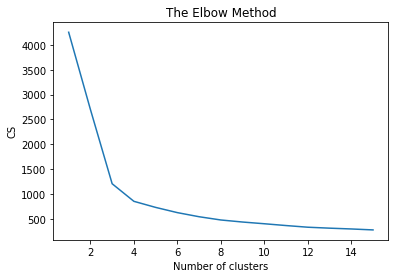

In [169]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 16), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

## Klasterisasi ke 4 Klaster

In [164]:
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [165]:
kmeans.cluster_centers_

array([[ 9.49867361e-01,  5.24899342e-01,  2.43137823e-02,
         7.80415361e-01,  4.07305522e-01,  1.82857713e-01,
         4.02365475e-01,  4.87685496e-01,  5.03658307e-01,
         3.62954677e-01,  8.89812486e-01,  8.59635236e-01,
         9.93770000e-01],
       [ 1.62092562e-14,  5.58654097e-01,  2.51629930e-03,
         7.93332891e-01,  4.56786606e-01,  5.06713262e-02,
         3.72545053e-01,  1.44798839e-01,  5.73758232e-01,
         4.15095030e-01,  9.02519451e-01,  8.65979434e-01,
         9.94833163e-01],
       [ 8.62346142e-01, -2.33146835e-15,  2.25995035e-02,
        -3.33066907e-16, -9.99200722e-16,  2.90826572e-01,
        -6.66133815e-16,  5.45486744e-01,  1.33226763e-15,
         3.33066907e-16,  4.44089210e-16, -3.99680289e-15,
         1.22124533e-15],
       [ 9.59834943e-01,  6.79042590e-01,  5.37882266e-02,
         8.23943241e-01,  5.81268529e-01,  3.64512849e-01,
         2.84154378e-01,  6.45563298e-01,  6.29707610e-01,
         6.02931026e-01,  8.91102020e

In [166]:
kmeans.inertia_

854.3687954581515